In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sympy as sp
from numpy import linalg as la
from sklearn.metrics import r2_score
%matplotlib inline

In [24]:
#data loading
data = np.genfromtxt('Dummy Data HSS.csv',delimiter=',',skip_header=1,usecols=[0,1,2,4],filling_values=0)
df = pd.DataFrame(data)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
cleaned_data = df.values
s=cleaned_data.shape[0]

In [25]:
class GradientDescent:
    def __init__(self, opt, batch_size, alpha, n_max, update_chk, grad_chk, gamma=None):
        self.opt = opt
        self.gamma = gamma
        self.batch_size = batch_size
        self.alpha = alpha
        self.n_max = n_max
        self.update_chk = update_chk
        self.grad_chk = grad_chk
        
    def divide_data(self, data):
        #declaring
        n_list = []
        #shuffle data
        np.random.seed(42)
        np.random.shuffle(data)
        p1, p2 = data.shape
        col = p2
        #divide into features and target
        x = data[:, 0:col-1]
        y = data[:, col-1]
        y = y.reshape(-1,1)
        x = np.insert(x, 0, np.ones(y.size), axis=1)
        #dividing into batches
        n_batch = int(np.ceil(y.size / self.batch_size))
        acc = self.batch_size
        for i in range(n_batch - 1):
            n_list.append(acc)
            acc += self.batch_size
        x_batches = np.array_split(x, n_list)
        y_batches = np.array_split(y, n_list)
        return x,y,col, n_batch, x_batches, y_batches
    
    def run(self,file):
        #call load data method
        x,y,col, n_batch, x_batches, y_batches = self.divide_data(file)
        #declaring 
        counter = 0
        flag = 0
        iterations_list = []
        error_list = []
        t = []
        j_list = []        
        #initializing
        thetas_0 = np.zeros((col,1))
        vs_0 = np.zeros((col,1))
        d_v = 0
        #check if batch size > data size
        if self.batch_size > y.size:
            print(f'batch size must be less or equal to data size {y.size}')
        else:
            for i in range(self.n_max):
                for k in range(n_batch):
                    #predict output
                    y_hat = x_batches[k] @ thetas_0
                    #calculate error
                    e = y_hat - y_batches[k]
                    j = (la.norm(e))**2 / (2 * len(y_batches[k]))
                    if j != np.inf:
                        error_list.append(j)
                    #calculate gradient
                    g_v = x_batches[k].T @ e / len(y_batches[k])
                    g_v_norm = la.norm(g_v)
                    #update parameters based on chosen optimizer
                    if self.opt == 1:
                        thetas_new = thetas_0 - (self.alpha * g_v)
                    else:
                        d_v = (self.gamma * vs_0) + (self.alpha * g_v)
                        thetas_new = thetas_0 - d_v
                    if j != np.inf:
                        t.append(thetas_new)
                    #set thetas for next iteration
                    thetas_0 = thetas_new
                    vs_0 = d_v
                    if j != np.inf:
                        counter += 1
                        iterations_list.append(counter)
                j_list.append(j)
                #check for convergence
                if j == np.inf:
                    flag = 1
                    break
                if i > 0:
                    if abs(j_list[-1] - j_list[-2]) < self.update_chk:
                        flag = 2
                        break
                if g_v_norm < self.grad_chk:
                    flag = 3
                    break
                else:
                    #Epochs report
                    print(f'***********************Epoch {i+1}***********************\n')
                    print(f'cost = {j}\n')
                    print(f'Gradient vector:\n {g_v}\n')
                    print(f'Gradient vector norm:\n {g_v_norm}\n')
                    print(f'thetas_new  = \n{thetas_new }\n')
            #epochs report
            print('***********************Training Report***********************\n') 
            if flag == 3:
                print(f'Gradient Descent converged after {i+1} Epochs\n')
            elif flag == 1:
                print(f'Gradient Descent is diverging\n')
            elif flag == 2:
                print(f'Gradient Descent updating is not significant anymore after {i+1} Epochs \n')    
            else:
                print(f'Gradient Descent reached max number of Epochs {self.n_max} \n')
            if flag != 1:
                print(f'number of iterations :\n{iterations_list[-1]}\n')
                print(f'thetas_Opt :\n{thetas_new}\n')
                print(f'cost = {j}\n')
                #new prediction and r_2
                y_hat = x @ thetas_new
                print(f'r2_score: {r2_score(y, y_hat)}')
            #plotting loss vs iterations
            plt.plot(iterations_list, error_list, marker='o', linestyle='-', color='blue')
            plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
            plt.xlabel('iterations')
            plt.ylabel('loss')
            plt.title(f'iterations vs loss using alpha={self.alpha}')
            plt.show()
            #plotting loss vs thetas
            for i in range(col):
                first_elements = [sublist[i] for sublist in t]
                plt.plot(first_elements, error_list, marker='o', linestyle='-', color='blue')
                plt.xlabel(f'theta{i}')
                plt.ylabel('loss')
                plt.title(f'theta{i} vs loss using alpha={self.alpha}')
                plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
                plt.show()

***********************Epoch 1***********************

cost = 22827.63613135861

Gradient vector:
 [[  -192.21402126]
 [-12788.20957195]
 [ -4268.46261906]
 [  -746.9249042 ]]

Gradient vector norm:
 13503.81132232222

thetas_new  = 
[[  1.92214021]
 [127.88209572]
 [ 42.68462619]
 [  7.46924904]]

***********************Epoch 2***********************

cost = 34777517.3409269

Gradient vector:
 [[  7508.05286041]
 [500072.12789802]
 [167495.34081144]
 [ 29283.98057462]]

Gradient vector norm:
 528243.073470955

thetas_new  = 
[[  -73.15838839]
 [-4872.83918326]
 [-1632.26878192]
 [ -285.3705567 ]]

***********************Epoch 3***********************

cost = 53217283436.63641

Gradient vector:
 [[  -293712.18759094]
 [-19562006.29669761]
 [ -6551693.96886391]
 [ -1145486.10843315]]

Gradient vector norm:
 20663861.92093427

thetas_new  = 
[[  2863.96348752]
 [190747.22378372]
 [ 63884.67090672]
 [ 11169.49052763]]

***********************Epoch 4***********************

cost = 81434430

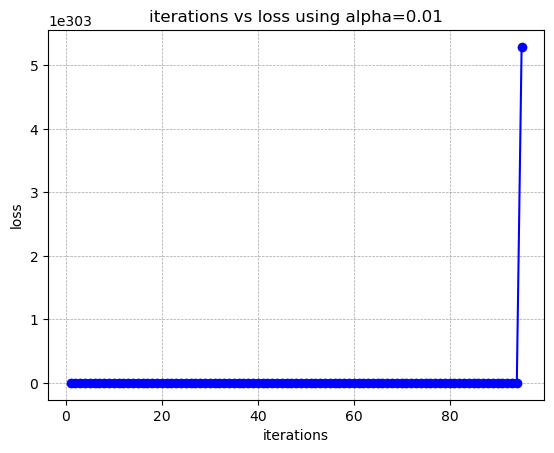

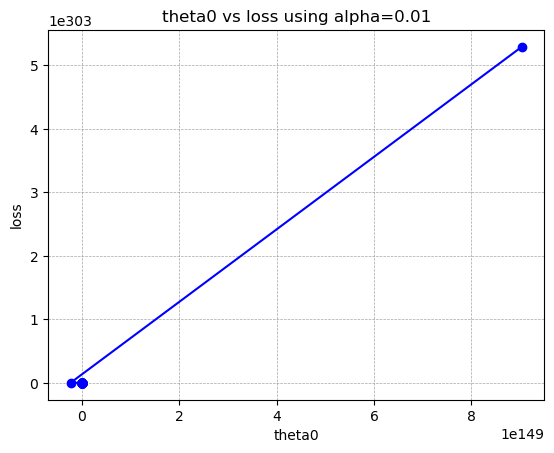

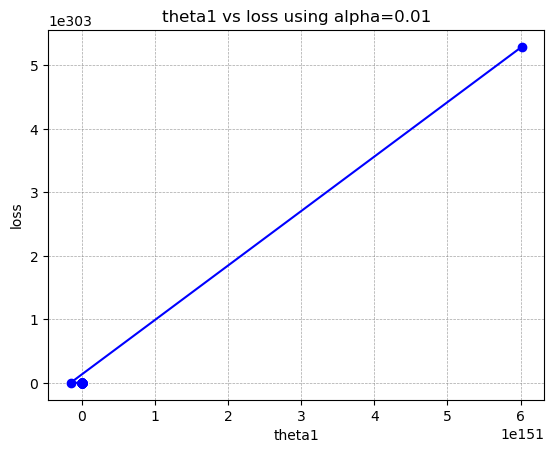

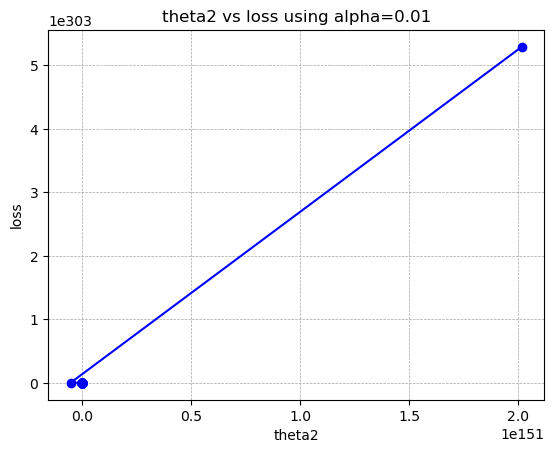

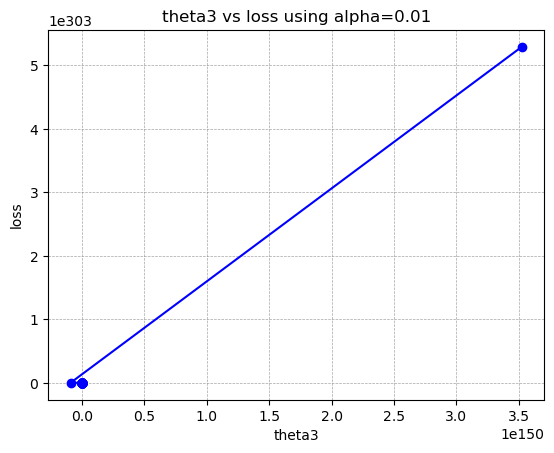

In [26]:
# Create an instance of GradientDescent_first
gd_1 = GradientDescent(1,       #enter 1 for vanilla and 2 for momentum
                     s,      #enter batch size
                     0.01,  #enter learning rate
                     1000,    #enter maximum number of iterations
                     0.1,   #enter convergance value for gradient
                     0.001,   #enter convergance value for cost
                     0.5)     #enter gamma ;default=None
# Call the run_gradient_descent method
gd_1.run(cleaned_data)

***********************Epoch 1***********************

cost = 22827.63613135861

Gradient vector:
 [[  -192.21402126]
 [-12788.20957195]
 [ -4268.46261906]
 [  -746.9249042 ]]

Gradient vector norm:
 13503.811322322206

thetas_new  = 
[[0.0192214 ]
 [1.27882096]
 [0.42684626]
 [0.07469249]]

***********************Epoch 2***********************

cost = 8250.16599917928

Gradient vector:
 [[ -115.21135245]
 [-7659.60619725]
 [-2550.82458476]
 [ -446.61584941]]

Gradient vector norm:
 8086.347292307278

thetas_new  = 
[[0.03074254]
 [2.04478158]
 [0.68192872]
 [0.11935408]]

***********************Epoch 3***********************

cost = 3022.902162982888

Gradient vector:
 [[  -69.10073436]
 [-4588.49669876]
 [-1522.28186176]
 [ -266.78689407]]

Gradient vector norm:
 4842.271592907387

thetas_new  = 
[[0.03765261]
 [2.50363125]
 [0.83415691]
 [0.14603276]]

***********************Epoch 4***********************

cost = 1148.4753083239518

Gradient vector:
 [[  -41.48886511]
 [-2749.453769

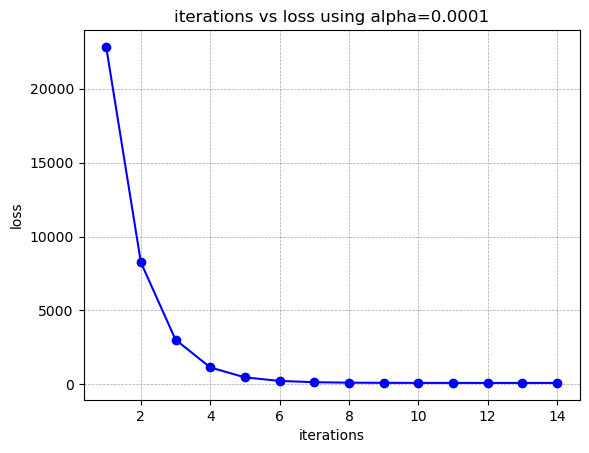

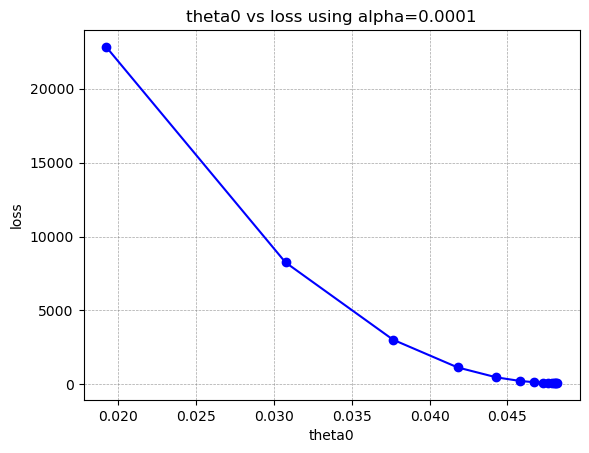

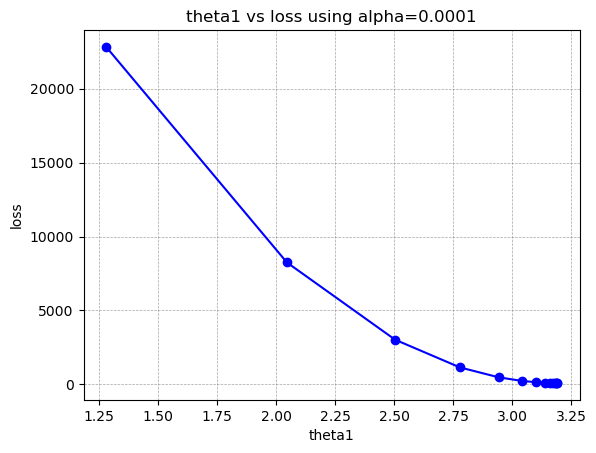

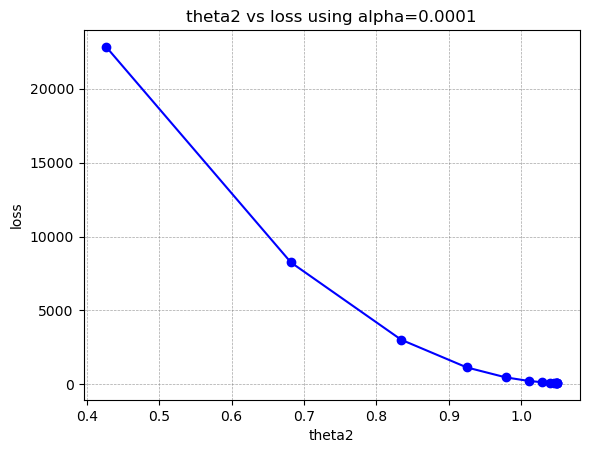

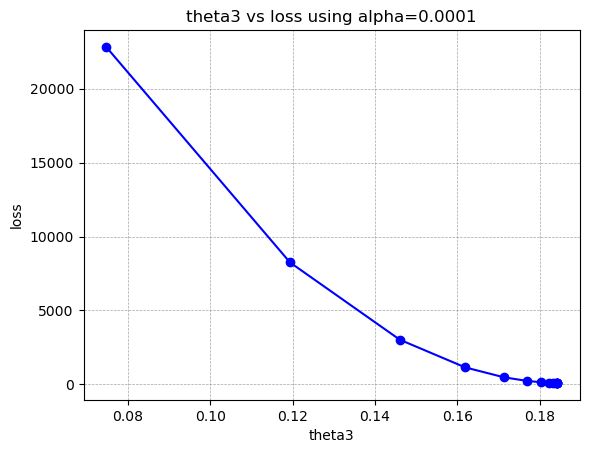

In [35]:
# Create an instance of GradientDescent_first
gd_1 = GradientDescent(1,       #enter 1 for vanilla and 2 for momentum
                     s,      #enter batch size
                     0.0001,  #enter learning rate
                     1000,    #enter maximum number of iterations
                     0.1,   #enter convergance value for gradient
                     0.001   #enter convergance value for cost
                     )     #enter gamma ;default=None
# Call the run_gradient_descent method
gd_1.run(cleaned_data)

***********************Epoch 1***********************

cost = 17.50872168402301

Gradient vector:
 [[ 0.20155139]
 [-8.2198965 ]
 [22.64166674]
 [ 2.81537297]]

Gradient vector norm:
 24.252396154780257

thetas_new  = 
[[0.0486379 ]
 [3.19104367]
 [1.03555946]
 [0.18032965]]

***********************Epoch 2***********************

cost = 16.794038611414148

Gradient vector:
 [[ 0.20106558]
 [-7.77333148]
 [22.10886279]
 [ 2.74928248]]

Gradient vector norm:
 23.59714977409815

thetas_new  = 
[[0.04927029]
 [3.2008433 ]
 [1.00761767]
 [0.1768527 ]]

***********************Epoch 3***********************

cost = 16.133474313683593

Gradient vector:
 [[ 0.19838653]
 [-7.4973594 ]
 [21.55218964]
 [ 2.67817738]]

Gradient vector norm:
 22.97649380430993

thetas_new  = 
[[0.04990791]
 [3.21012551]
 [0.98107081]
 [0.17359467]]

***********************Epoch 4***********************

cost = 15.52251034567214

Gradient vector:
 [[ 0.19585718]
 [-7.23544735]
 [21.02351439]
 [ 2.61079798]]

Gradient

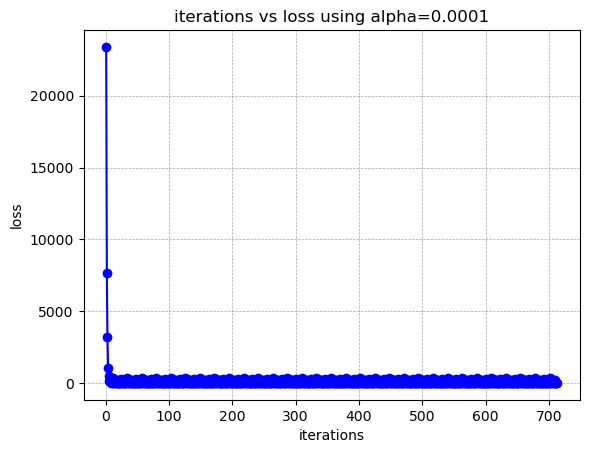

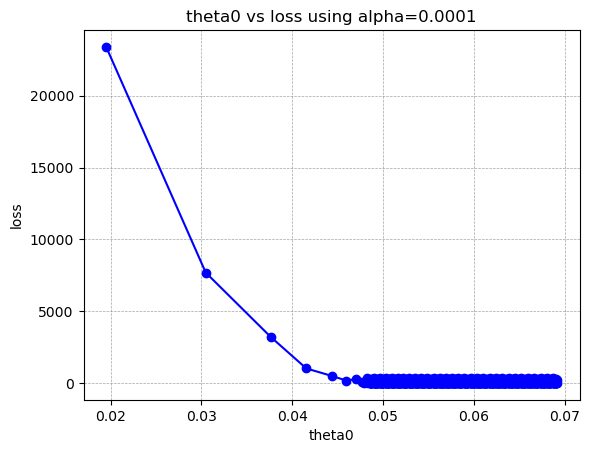

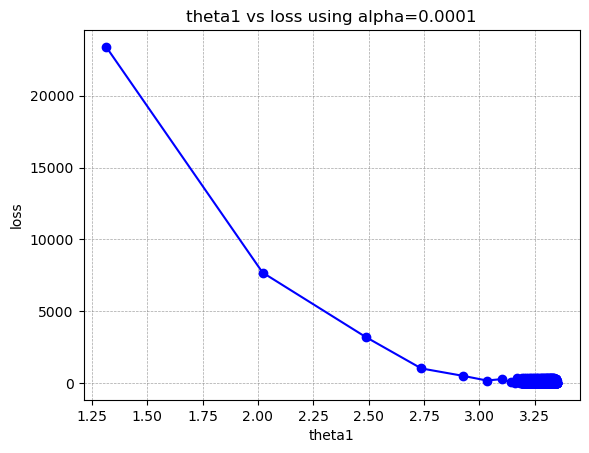

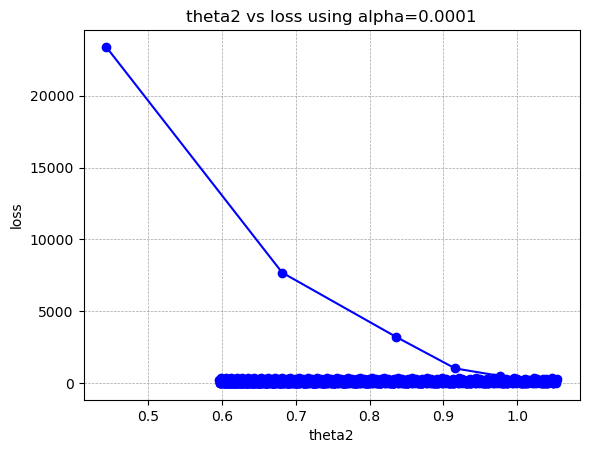

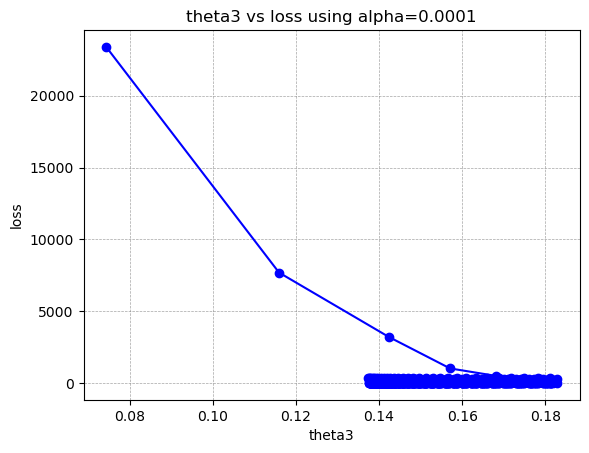

In [36]:
# Create an instance of GradientDescent_first
gd_1 = GradientDescent(1,       #enter 1 for vanilla and 2 for momentum
                     200,      #enter batch size
                     0.0001,  #enter learning rate
                     1000,    #enter maximum number of iterations
                     0.1,   #enter convergance value for gradient
                     0.001   #enter convergance value for cost
                     )     #enter gamma ;default=None
# Call the run_gradient_descent method
gd_1.run(cleaned_data)

***********************Epoch 1***********************

cost = 20.265312397975435

Gradient vector:
 [[  6.36636669]
 [477.47750154]
 [196.47204635]
 [ 32.04549255]]

Gradient vector norm:
 517.3523689810867

thetas_new  = 
[[0.1854119 ]
 [3.20609837]
 [0.69003051]
 [0.24620821]]

***********************Training Report***********************

Gradient Descent updating is not significant anymore after 2 Epochs 

number of iterations :
9144

thetas_Opt :
[[0.31199501]
 [3.20495451]
 [0.68522076]
 [0.26810936]]

cost = 20.314095963905118

r2_score: 0.9735198555055136


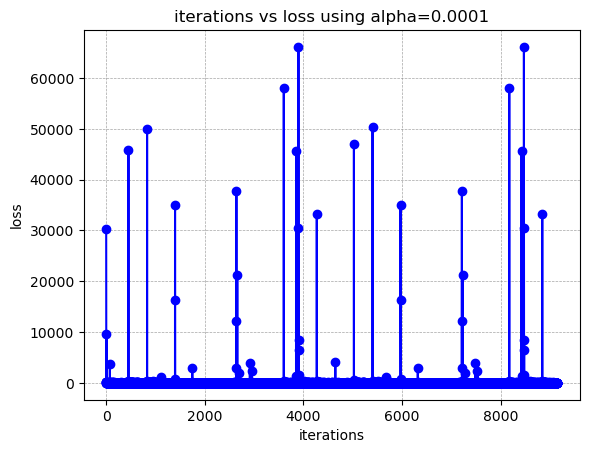

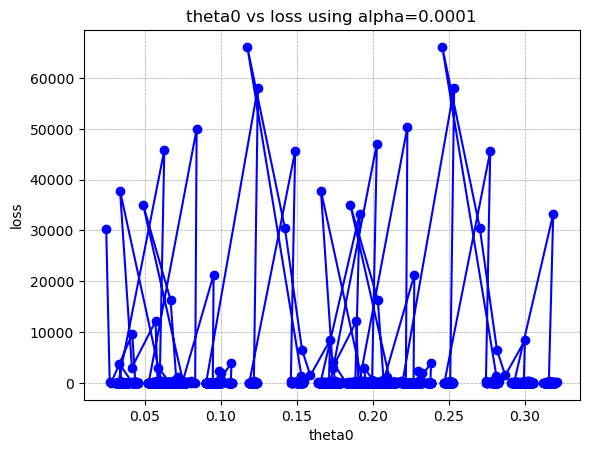

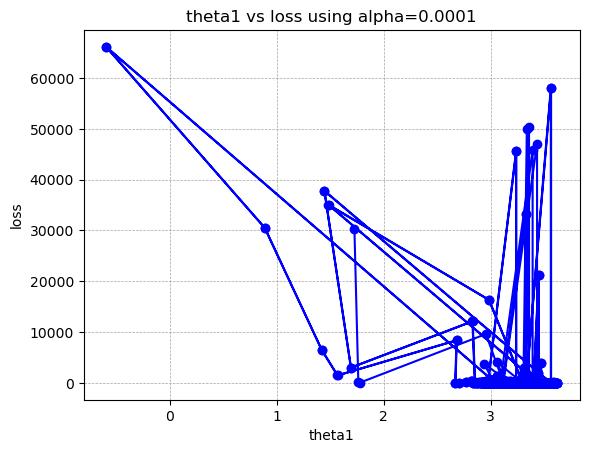

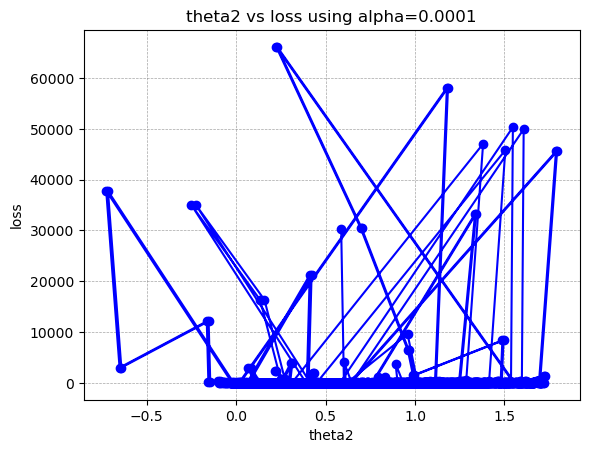

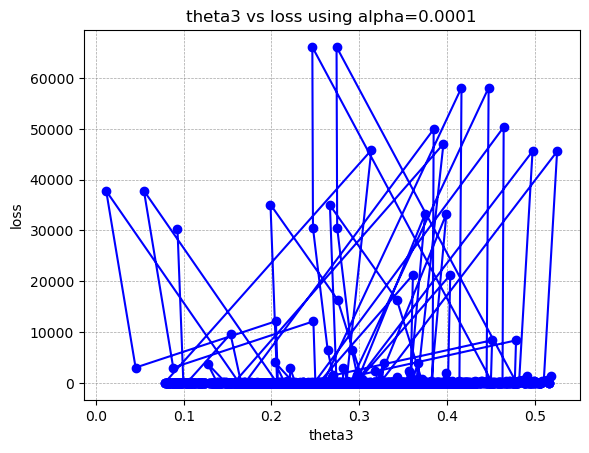

In [37]:
# Create an instance of GradientDescent_first
gd_1 = GradientDescent(1,       #enter 1 for vanilla and 2 for momentum
                     1,      #enter batch size
                     0.0001,  #enter learning rate
                     1000,    #enter maximum number of iterations
                     0.1,   #enter convergance value for gradient
                     0.001    #enter convergance value for cost
                     )     #enter gamma ;default=None
# Call the run_gradient_descent method
gd_1.run(cleaned_data)

***********************Epoch 1***********************

cost = 22827.63613135861

Gradient vector:
 [[  -192.21402126]
 [-12788.20957195]
 [ -4268.46261906]
 [  -746.9249042 ]]

Gradient vector norm:
 13503.811322322212

thetas_new  = 
[[0.0192214 ]
 [1.27882096]
 [0.42684626]
 [0.07469249]]

***********************Epoch 2***********************

cost = 8250.165999179273

Gradient vector:
 [[ -115.21135245]
 [-7659.60619725]
 [-2550.82458476]
 [ -446.61584941]]

Gradient vector norm:
 8086.347292307267

thetas_new  = 
[[0.04035324]
 [2.68419206]
 [0.89535185]
 [0.15670032]]

***********************Epoch 3***********************

cost = 667.9070090697415

Gradient vector:
 [[  -30.59939996]
 [-2024.19501141]
 [ -663.46284461]
 [ -116.63236667]]

Gradient vector norm:
 2133.562237810618

thetas_new  = 
[[0.0539791 ]
 [3.58929711]
 [1.19595093]
 [0.20936747]]

***********************Epoch 4***********************

cost = 460.2473177991078

Gradient vector:
 [[  23.87242018]
 [1603.80657313

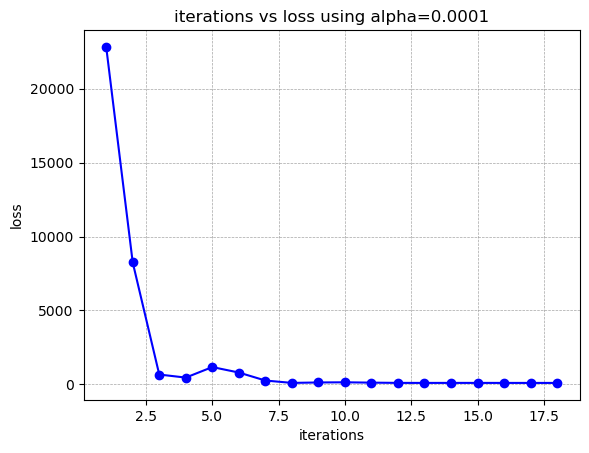

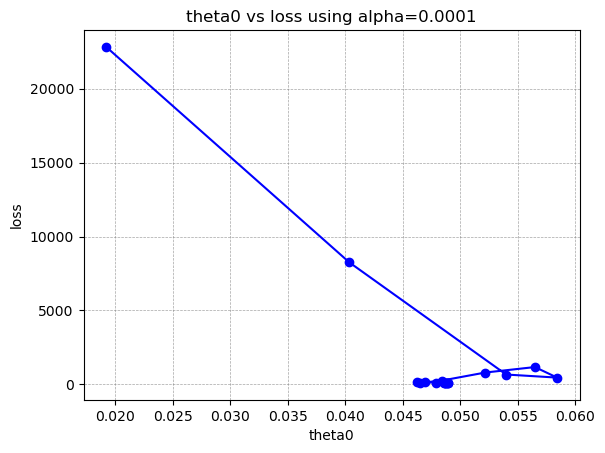

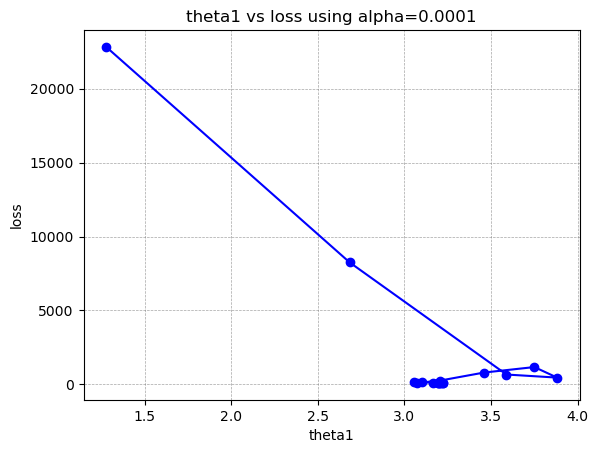

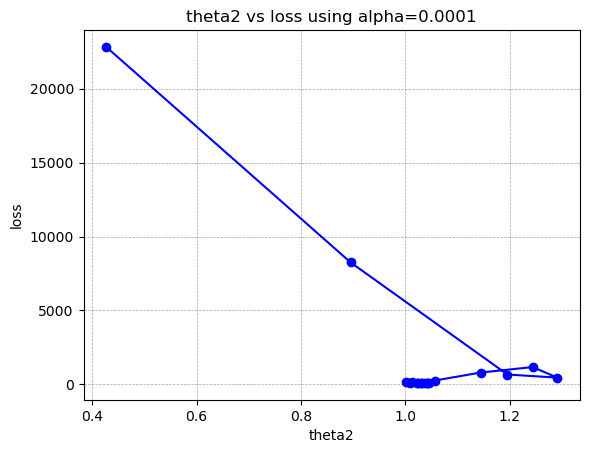

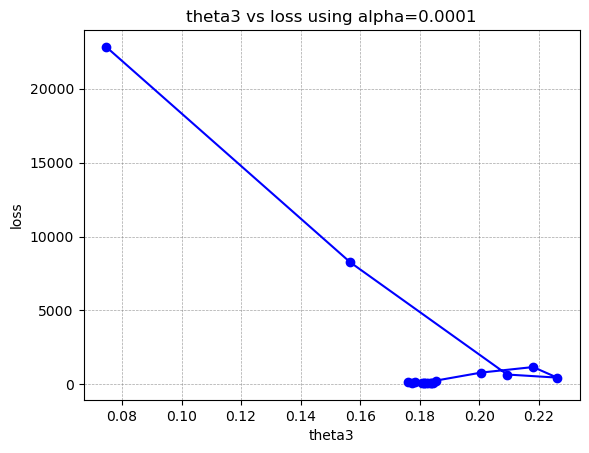

In [38]:
# Create an instance of GradientDescent_first
gd_1 = GradientDescent(2,       #enter 1 for vanilla and 2 for momentum
                     s,      #enter batch size
                     0.0001,  #enter learning rate
                     1000,    #enter maximum number of iterations
                     0.1,   #enter convergance value for gradient
                     0.001,   #enter convergance value for cost
                     0.5)     #enter gamma ;default=None
# Call the run_gradient_descent method
gd_1.run(cleaned_data)

***********************Epoch 1***********************

cost = 233.099839275564

Gradient vector:
 [[  1.72435941]
 [154.3805221 ]
 [ 66.96813427]
 [  7.16630676]]

Gradient vector norm:
 168.44110537201735

thetas_new  = 
[[0.04742873]
 [3.21012714]
 [0.9897919 ]
 [0.17990458]]

***********************Epoch 2***********************

cost = 232.16189139417898

Gradient vector:
 [[  1.64341491]
 [149.52835554]
 [ 64.34358153]
 [  6.6768799 ]]

Gradient vector norm:
 162.92976134785633

thetas_new  = 
[[0.04873038]
 [3.22567632]
 [0.93999776]
 [0.1740645 ]]

***********************Epoch 3***********************

cost = 231.53429621502517

Gradient vector:
 [[  1.63164959]
 [149.20934373]
 [ 63.3401944 ]
 [  6.46435511]]

Gradient vector norm:
 162.23396269175177

thetas_new  = 
[[0.05006862]
 [3.24071981]
 [0.89543255]
 [0.16904502]]

***********************Epoch 4***********************

cost = 231.0030767522447

Gradient vector:
 [[  1.62107978]
 [148.92071621]
 [ 62.43573952]
 [  6.273

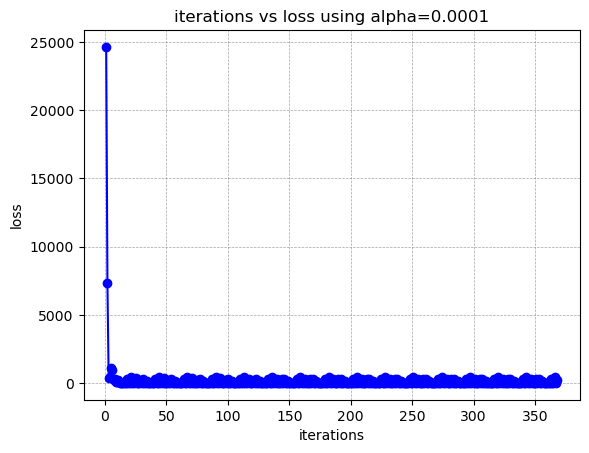

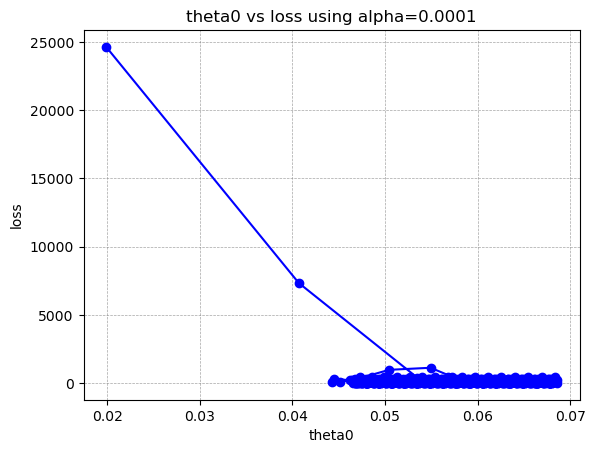

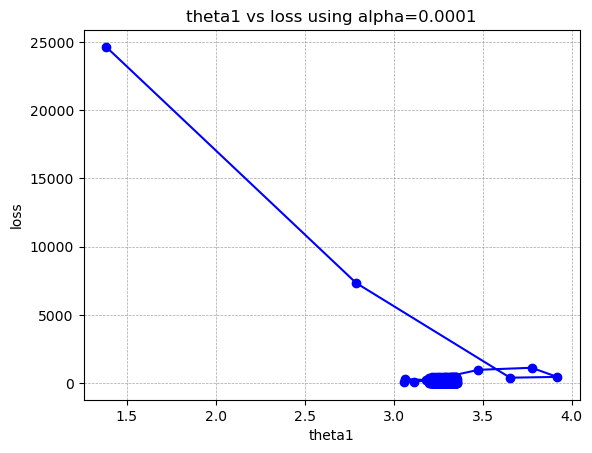

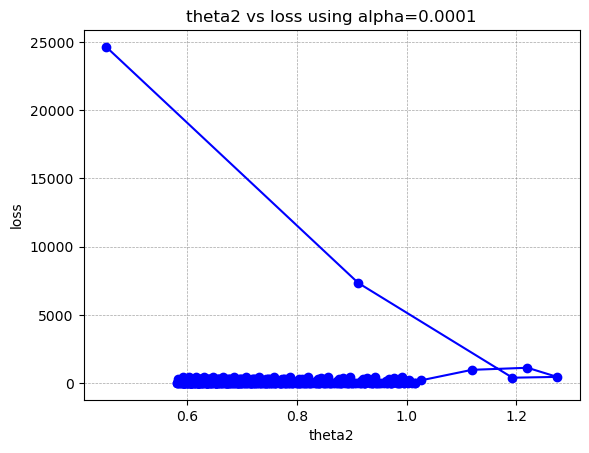

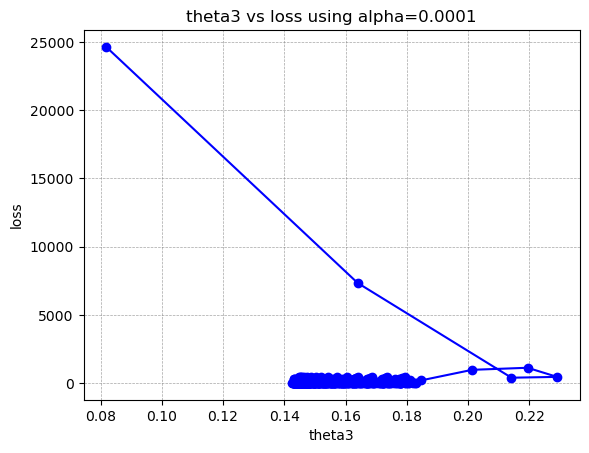

In [45]:
# Create an instance of GradientDescent_first
gd_1 = GradientDescent(2,       #enter 1 for vanilla and 2 for momentum
                     200,      #enter batch size
                     0.0001,  #enter learning rate
                     1000,    #enter maximum number of iterations
                     0.1,   #enter convergance value for gradient
                     0.001,   #enter convergance value for cost
                     0.5)     #enter gamma ;default=None
# Call the run_gradient_descent method
gd_1.run(cleaned_data)

***********************Epoch 1***********************

cost = 0.21538177792331922

Gradient vector:
 [[ 0.6563258 ]
 [19.689774  ]
 [ 7.39395456]
 [ 0.09458771]]

Gradient vector norm:
 21.042753494401353

thetas_new  = 
[[0.33450241]
 [2.76177444]
 [1.73156355]
 [0.56920712]]

***********************Training Report***********************

Gradient Descent updating is not significant anymore after 2 Epochs 

number of iterations :
9144

thetas_Opt :
[[0.5562105 ]
 [2.75988042]
 [1.72734715]
 [0.57291577]]

cost = 0.3027575123518649

r2_score: 0.9599119686212669


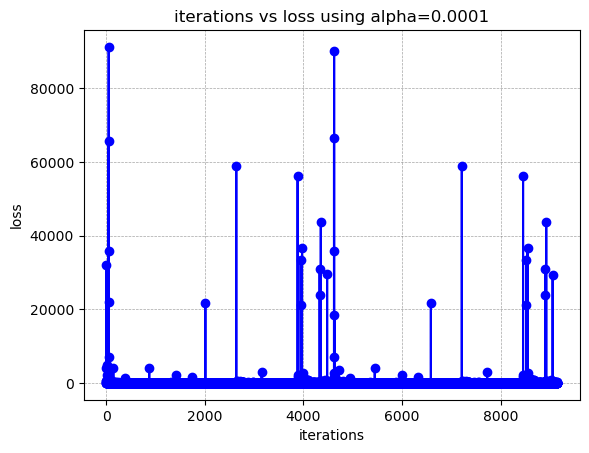

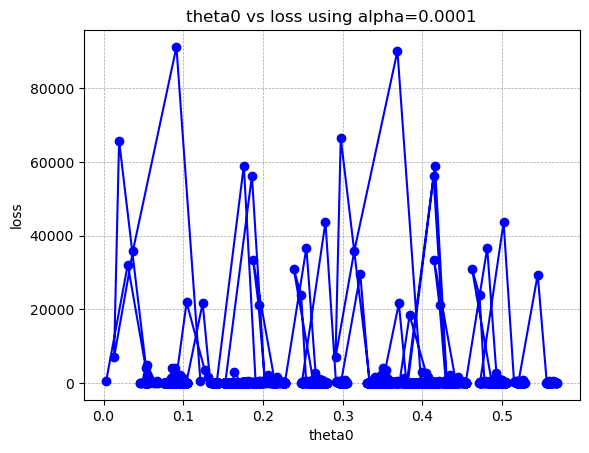

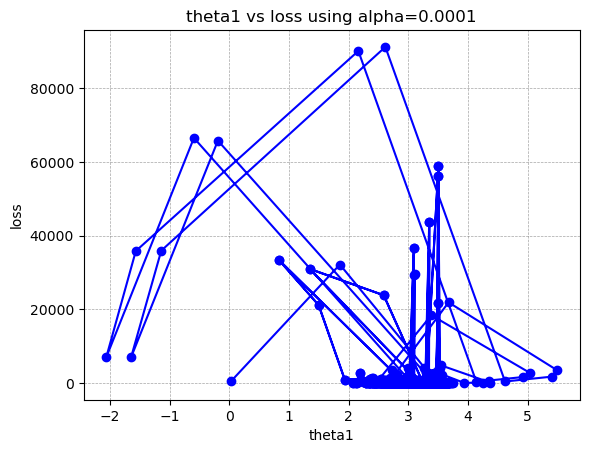

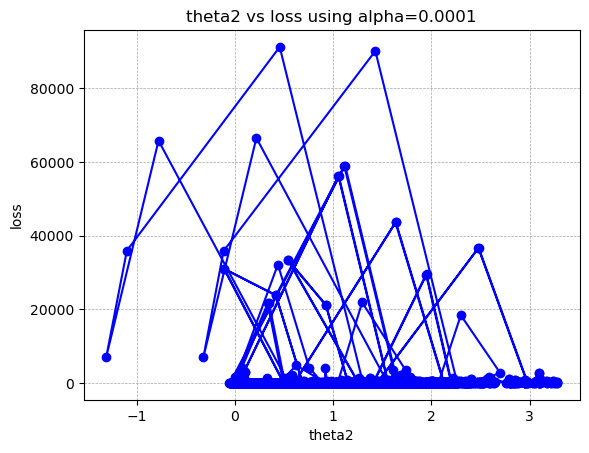

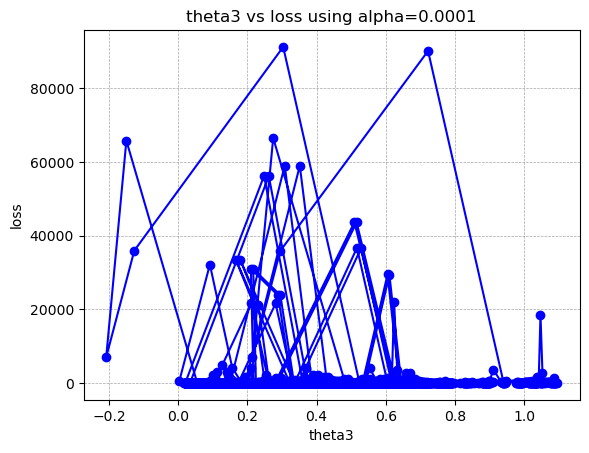

In [32]:
# Create an instance of GradientDescent_first
gd_1 = GradientDescent(2,       #enter 1 for vanilla and 2 for momentum
                     1,      #enter batch size
                     0.0001,  #enter learning rate
                     1000,    #enter maximum number of iterations
                     0.1,   #enter convergance value for gradient
                     0.001,   #enter convergance value for cost
                     0.5)     #enter gamma ;default=None
# Call the run_gradient_descent method
gd_1.run(cleaned_data)

***********************Epoch 1***********************

cost = 22827.63613135861

Gradient vector:
 [[  -192.21402126]
 [-12788.20957195]
 [ -4268.46261906]
 [  -746.9249042 ]]

Gradient vector norm:
 13503.81132232222

thetas_new  = 
[[0.0192214 ]
 [1.27882096]
 [0.42684626]
 [0.07469249]]

***********************Epoch 2***********************

cost = 8250.165999179266

Gradient vector:
 [[ -115.21135245]
 [-7659.60619725]
 [-2550.82458476]
 [ -446.61584941]]

Gradient vector norm:
 8086.347292307269

thetas_new  = 
[[0.03266468]
 [2.17266367]
 [0.72461335]
 [0.12682332]]

***********************Epoch 3***********************

cost = 2405.5902565719184

Gradient vector:
 [[  -61.40046748]
 [-4075.63636129]
 [-1350.51805833]
 [ -236.75598859]]

Gradient vector norm:
 4300.527199176158

thetas_new  = 
[[0.04014905]
 [2.66961158]
 [0.88944186]
 [0.15571201]]

***********************Epoch 4***********************

cost = 701.9599333872891

Gradient vector:
 [[  -31.4967148 ]
 [-2083.945835

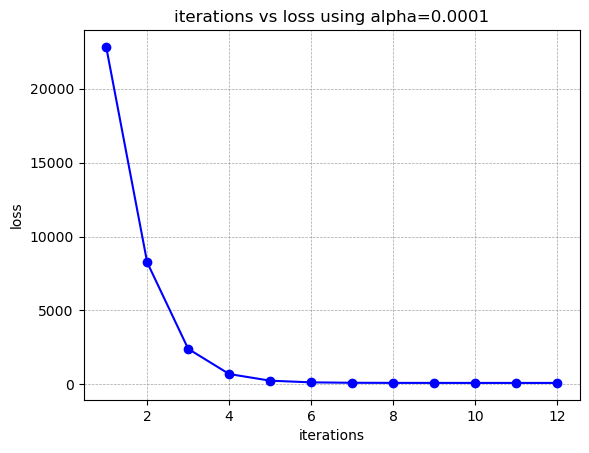

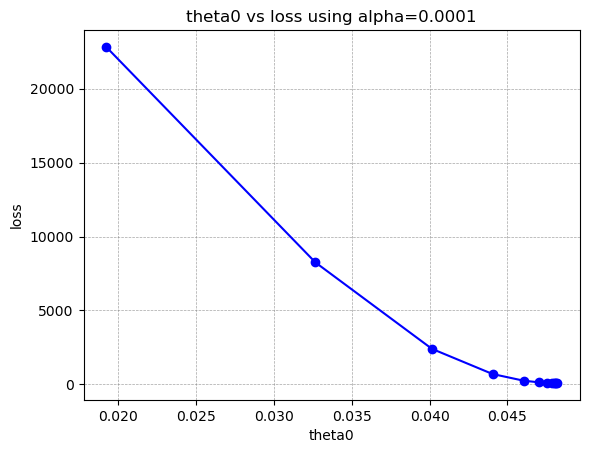

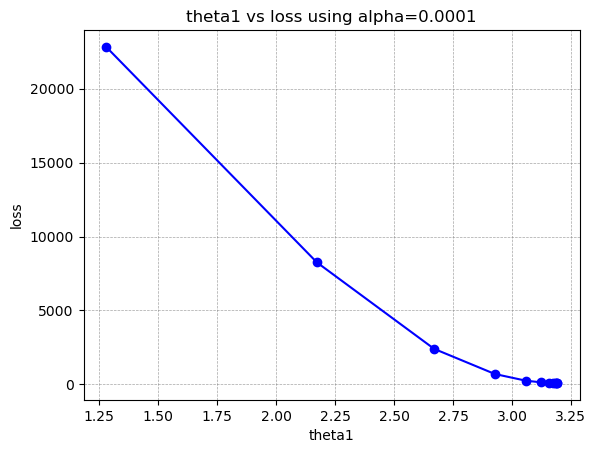

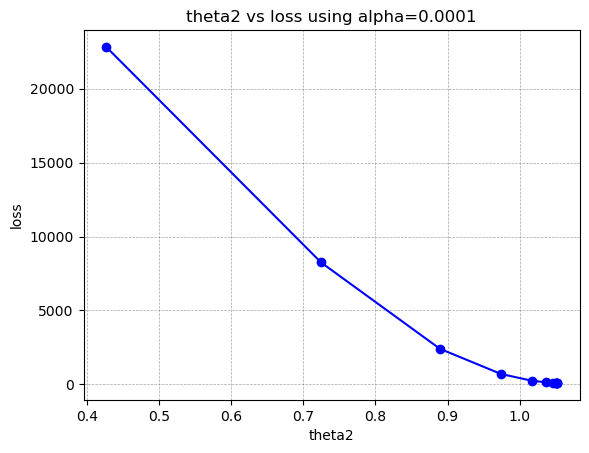

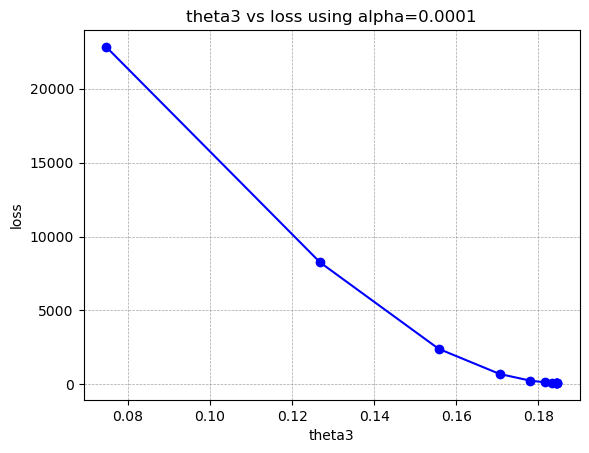

In [49]:
# Create an instance of GradientDescent_first
gd_1 = GradientDescent(2,       #enter 1 for vanilla and 2 for momentum
                     s,      #enter batch size
                     0.0001,  #enter learning rate
                     1000,    #enter maximum number of iterations
                     0.1,   #enter convergance value for gradient
                     0.001,   #enter convergance value for cost
                     0.1)     #enter gamma ;default=None
# Call the run_gradient_descent method
gd_1.run(cleaned_data)

***********************Epoch 1***********************

cost = 1101.4492460963384

Gradient vector:
 [[  36.41666192]
 [2577.10499906]
 [ 814.89177992]
 [ 146.62266051]]

Gradient vector norm:
 2707.091274230314

thetas_new  = 
[[0.06301571]
 [4.20983597]
 [1.14491724]
 [0.25021289]]

***********************Epoch 2***********************

cost = 269.8025021623389

Gradient vector:
 [[  -4.48727256]
 [-207.17084717]
 [-110.62652937]
 [ -22.93413855]]

Gradient vector norm:
 236.0171587939769

thetas_new  = 
[[0.05437305]
 [3.11364794]
 [0.56678144]
 [0.15366503]]

***********************Epoch 3***********************

cost = 273.52723817570217

Gradient vector:
 [[  -4.69203277]
 [-219.64382018]
 [-116.91982549]
 [ -24.10715347]]

Gradient vector norm:
 250.03364445241615

thetas_new  = 
[[0.06493286]
 [3.37001062]
 [0.57964428]
 [0.16186151]]

***********************Epoch 4***********************

cost = 268.656194360334

Gradient vector:
 [[ -0.96690626]
 [ 35.29347387]
 [-34.25448821]

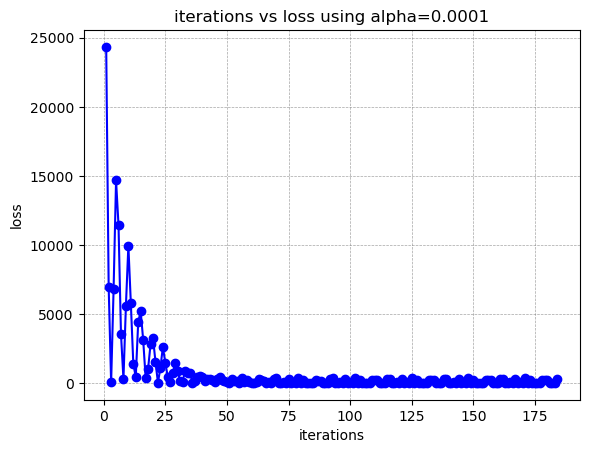

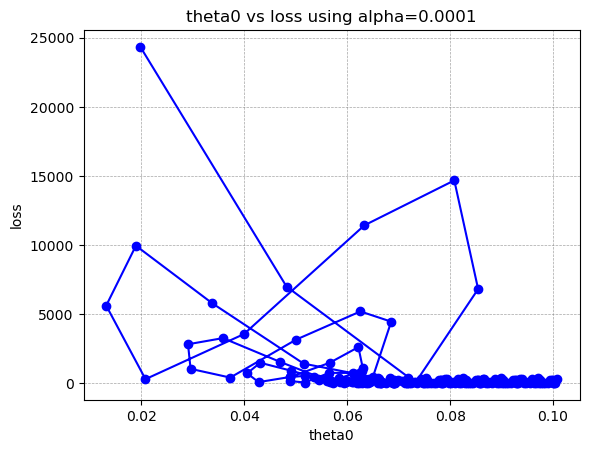

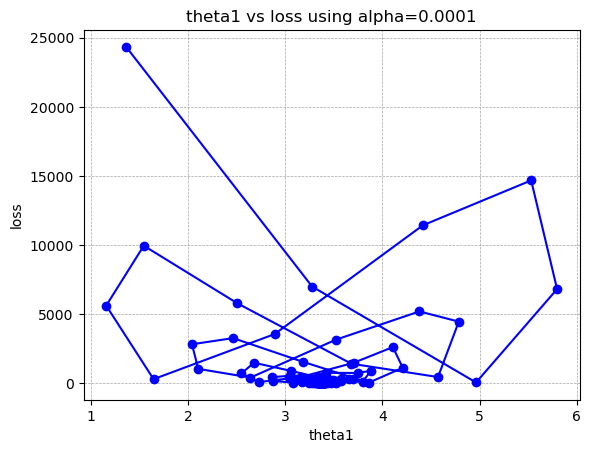

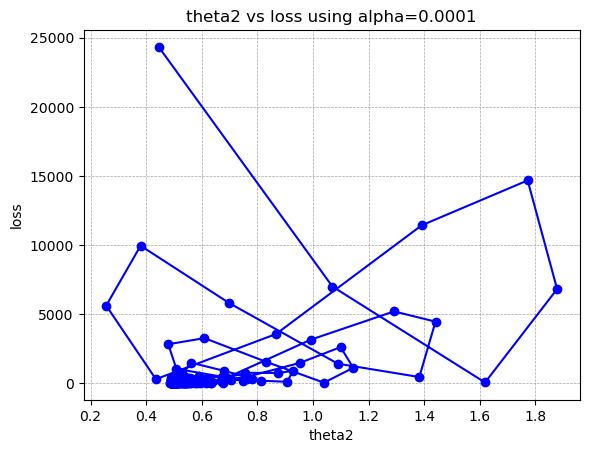

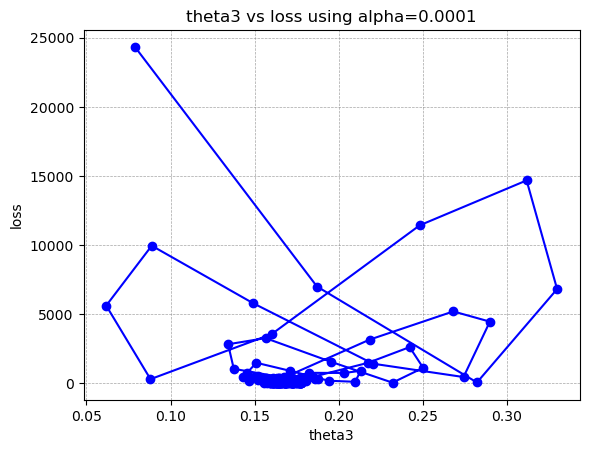

In [50]:
# Create an instance of GradientDescent_first
gd_1 = GradientDescent(2,       #enter 1 for vanilla and 2 for momentum
                     200,      #enter batch size
                     0.0001,  #enter learning rate
                     1000,    #enter maximum number of iterations
                     0.1,   #enter convergance value for gradient
                     0.001,   #enter convergance value for cost
                     0.9)     #enter gamma ;default=None
# Call the run_gradient_descent method
gd_1.run(cleaned_data)

In [74]:
class BFGS:
    def __init__(self, initial_val, batch_size, alpha, n_max, update_chk, grad_chk):
        self.batch_size = batch_size
        self.alpha = alpha
        self.n_max = n_max
        self.initial_val = initial_val
        self.update_chk = update_chk
        self.grad_chk = grad_chk
        
    def divide_data(self, data):
        #declaring
        n_list = []
        #shuffle data
        np.random.seed(42)
        np.random.shuffle(data)
        p1, p2 = data.shape
        col = p2
        #divide into features and target
        x = data[:, 0:col-1]
        y = data[:, col-1]
        y = y.reshape(-1,1)
        x = np.insert(x, 0, np.ones(y.size), axis=1)
        #dividing into batches
        n_batch = int(np.ceil(y.size / self.batch_size))
        acc = self.batch_size
        for i in range(n_batch - 1):
            n_list.append(acc)
            acc += self.batch_size
        x_batches = np.array_split(x, n_list)
        y_batches = np.array_split(y, n_list)
        return x,y,col, n_batch, x_batches, y_batches
    
    def run(self,file):
        #call load data method
        x,y,col, n_batch, x_batches, y_batches = self.divide_data(file)
        #declaring 
        counter = 0
        flag = 0
        iterations_list = []
        error_list = []
        t = []
        j_list = []        
        #initializing
        B_inv0=np.identity(col)
        thetas_0 = np.full((col,1), self.initial_val)
        thetas_0_prev = np.full((col,1), self.initial_val - .001)
        #check if batch size > data size
        if self.batch_size > y.size:
            print(f'batch size must be less or equal to data size {y.size}')
        else:
            for i in range(self.n_max):
                for k in range(n_batch):
                    #predict output
                    y_hat_0 = x_batches[k] @ thetas_0
                    y_hat_0_prev = x_batches[k] @ thetas_0_prev
                    #calculate error
                    e_0 = y_hat_0 - y_batches[k]
                    e_0_prev = y_hat_0_prev - y_batches[k]
                    j = (la.norm(e_0))**2 / (2 * len(y_batches[k]))
                    if j != np.inf:
                        error_list.append(j)
                    #calculate gradient
                    g_v_0 = x_batches[k].T @ e_0 / len(y_batches[k])
                    g_v_0_norm = la.norm(g_v_0)
                    g_v_0_prev = x_batches[k].T @ e_0_prev / len(y_batches[k])
                    g_v_0_prev_norm = la.norm(g_v_0_prev)
                    #calculate update terms
                    delta_grad = (g_v_0 - g_v_0_prev).reshape(-1,1)
                    delta_thetas=(thetas_0 - thetas_0_prev).reshape(-1,1)
                    term1=np.eye(col) - ((delta_thetas @ delta_grad.T)/(delta_grad.T @ delta_thetas))
                    term2=np.eye(col) - ((delta_grad @ delta_thetas.T)/(delta_grad.T @ delta_thetas))
                    term3=(delta_thetas @ delta_thetas.T)/(delta_grad.T @ delta_thetas)       
                    #update parameters
                    B_inv_new = term1 @ B_inv0 @ term2 + term3
                    thetas_new = thetas_0 - self.alpha * (B_inv_new @ g_v_0)
                    #set thetas for next iteration
                    thetas_0_prev = thetas_0
                    thetas_0 = thetas_new
                    if j != np.inf:
                        t.append(thetas_new)
                    if j != np.inf:
                        counter += 1
                        iterations_list.append(counter)
                j_list.append(j)
                #check for convergence
                if j == np.inf:
                    flag = 1
                    break
                if i > 0:
                    if abs(j_list[-1] - j_list[-2]) < self.update_chk:
                        flag = 2
                        break
                if g_v_0_norm < self.grad_chk:
                    flag = 3
                    break
                else:
                    #Epochs report
                    print(f'***********************Epoch {i+1}***********************\n')
                    print(f'cost = {j}\n')
                    print(f'Gradient vector:\n {g_v_0}\n')
                    print(f'Gradient vector norm:\n {g_v_0_norm}\n')
                    print(f'thetas_new  = \n{thetas_new }\n')
            #epochs report
            print('***********************Training Report***********************\n') 
            if flag == 3:
                print(f'Gradient Descent converged after {i+1} Epochs\n')
            elif flag == 1:
                print(f'Gradient Descent is diverging\n')
            elif flag == 2:
                print(f'Gradient Descent updating is not significant anymore after {i+1} Epochs \n')    
            else:
                print(f'Gradient Descent reached max number of Epochs {self.n_max} \n')
            if flag != 1:
                print(f'number of iterations :\n{iterations_list[-1]}\n')
                print(f'thetas_Opt :\n{thetas_new}\n')
                print(f'cost = {j}\n')
                #new prediction and r_2
                y_hat = x @ thetas_new
                print(f'r2_score: {r2_score(y, y_hat)}')
            #plotting loss vs iterations
            plt.plot(iterations_list, error_list, marker='o', linestyle='-', color='blue')
            plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
            plt.xlabel('iterations')
            plt.ylabel('loss')
            plt.title(f'iterations vs loss using alpha={self.alpha}')
            plt.show()
            #plotting loss vs thetas
            for i in range(col):
                first_elements = [sublist[i] for sublist in t]
                plt.plot(first_elements, error_list, marker='o', linestyle='-', color='blue')
                plt.xlabel(f'theta{i}')
                plt.ylabel('loss')
                plt.title(f'theta{i} vs loss using alpha={self.alpha}')
                plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
                plt.show()


***********************Epoch 1***********************

cost = 22827.63613135861

Gradient vector:
 [[  -192.21402126]
 [-12788.20957195]
 [ -4268.46261906]
 [  -746.9249042 ]]

Gradient vector norm:
 13503.811322322214

thetas_new  = 
[[-0.00254769]
 [ 0.00286077]
 [-0.00661321]
 [-0.00383116]]

***********************Epoch 2***********************

cost = 22822.632513306762

Gradient vector:
 [[  -192.19494563]
 [-12786.77571306]
 [ -4268.1615528 ]
 [  -746.87932387]]

Gradient vector norm:
 13502.35549073999

thetas_new  = 
[[ 1.89527489]
 [-1.21359248]
 [ 5.22995955]
 [ 2.89138781]]

***********************Epoch 3***********************

cost = 14849.049949083132

Gradient vector:
 [[  -151.2972969 ]
 [-10184.30694054]
 [ -3263.03394851]
 [  -565.93078582]]

Gradient vector norm:
 10710.306575193174

thetas_new  = 
[[ 1.14796383]
 [-0.35156677]
 [ 3.23351993]
 [ 1.75574574]]

***********************Epoch 4***********************

cost = 13425.86608893541

Gradient vector:
 [[ -145.5

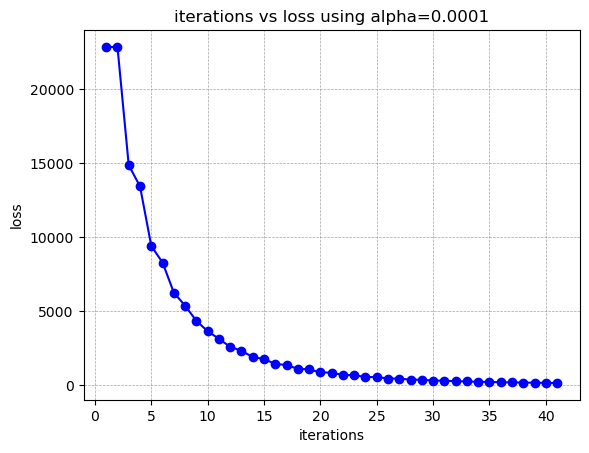

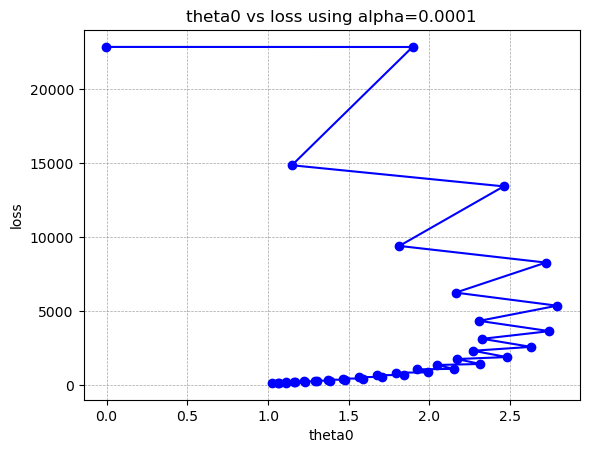

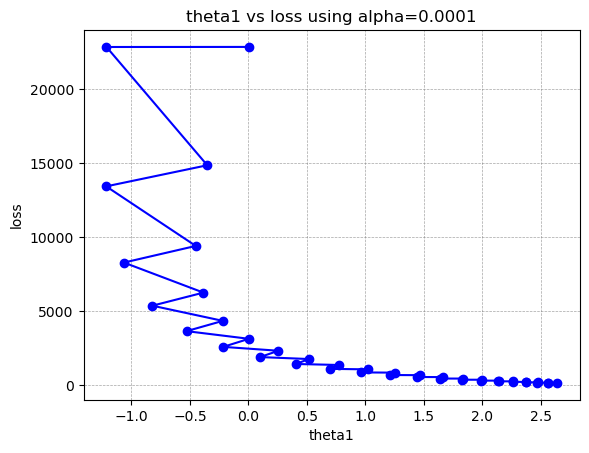

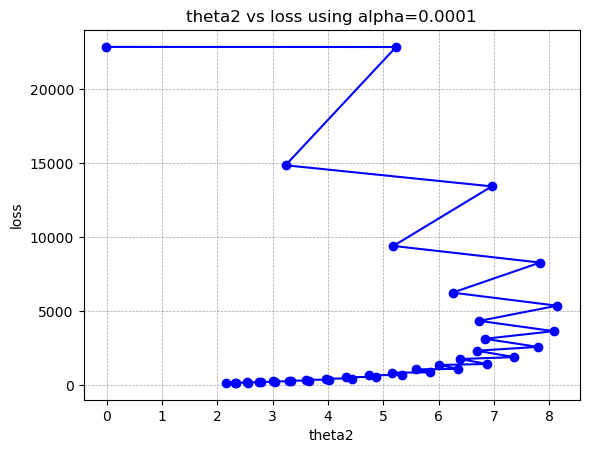

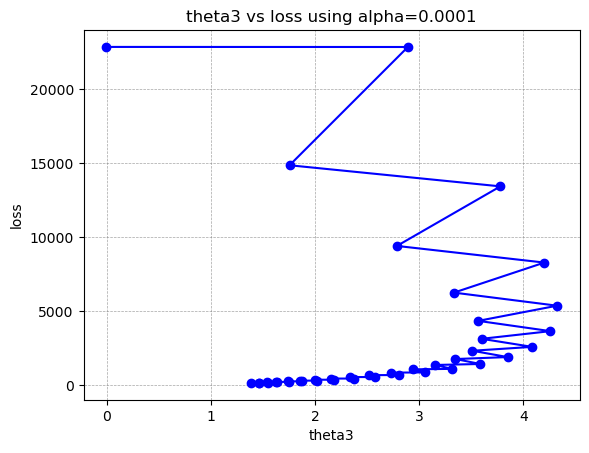

In [84]:
# Create an instance of GradientDescent_first
gd_2 = BFGS(0,      #enter initialization values
            s,     #enter batch size
            0.0001,  #enter learning rate
            1000,    #enter maximum number of iterations
            0.1,   #enter convergance value for gradient
            0.001)   #enter convergance value for cost
# Call the run_gradient_descent method
gd_2.run(cleaned_data)

***********************Epoch 1***********************

cost = 121.95031655597003

Gradient vector:
 [[ 15.61731837]
 [406.05027765]
 [178.52027756]
 [ 25.56691355]]

Gradient vector norm:
 444.57157487403754

thetas_new  = 
[[2.27666046]
 [2.27666046]
 [2.27666046]
 [2.27666046]]

***********************Training Report***********************

Gradient Descent updating is not significant anymore after 2 Epochs 

number of iterations :
9144

thetas_Opt :
[[2.27666046]
 [2.27666046]
 [2.27666046]
 [2.27666046]]

cost = 121.9503165587207

r2_score: 0.9119716906117522


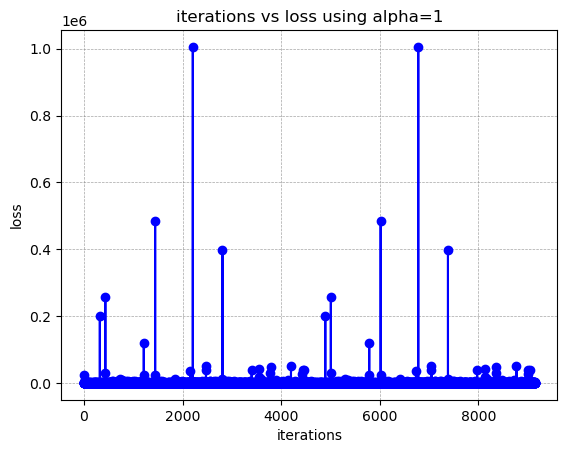

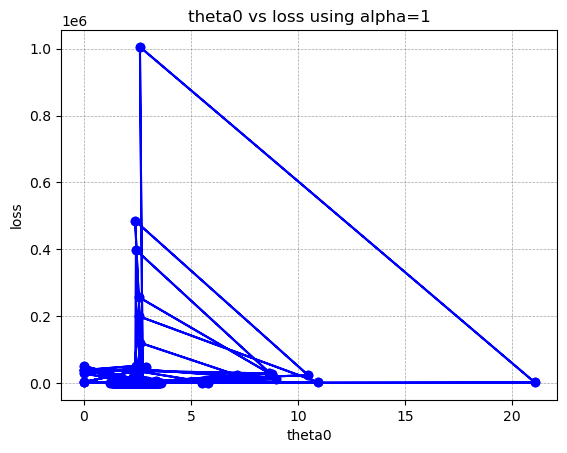

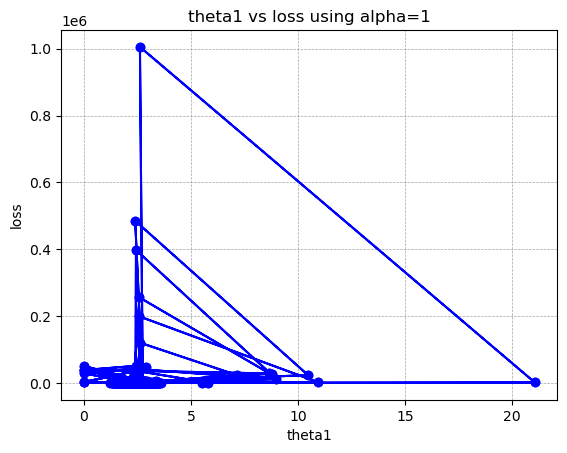

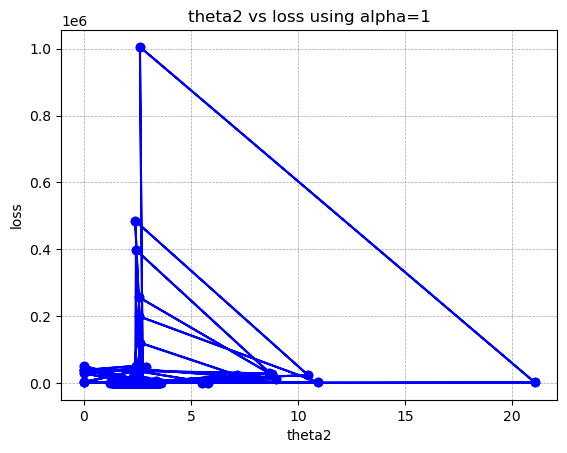

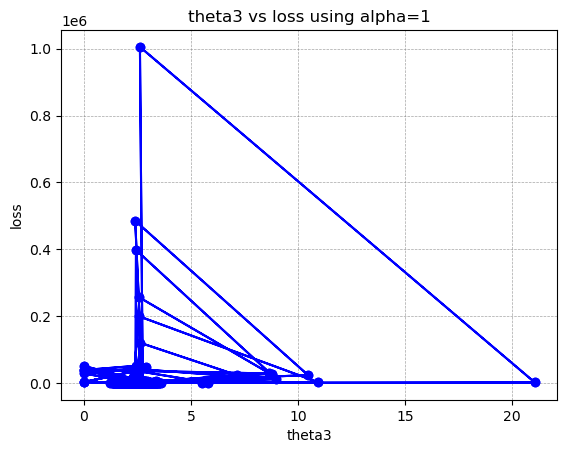

In [80]:
# Create an instance of GradientDescent_first
gd_2 = BFGS(0,      #enter initialization values
            1,     #enter batch size
            1,  #enter learning rate
            1000,    #enter maximum number of iterations
            0.1,   #enter convergance value for gradient
            0.001)   #enter convergance value for cost
# Call the run_gradient_descent method
gd_2.run(cleaned_data)

***********************Epoch 1***********************

cost = 446.65545905437364

Gradient vector:
 [[  29.88830738]
 [2958.94243073]
 [1097.54533138]
 [ 236.63536027]]

Gradient vector norm:
 3164.9384934710306

thetas_new  = 
[[2.44007769]
 [2.44007769]
 [2.44007769]
 [2.44007769]]

***********************Training Report***********************

Gradient Descent updating is not significant anymore after 2 Epochs 

number of iterations :
9144

thetas_Opt :
[[2.44007769]
 [2.44007769]
 [2.44007769]
 [2.44007769]]

cost = 446.655459038237

r2_score: 0.9546400426752749


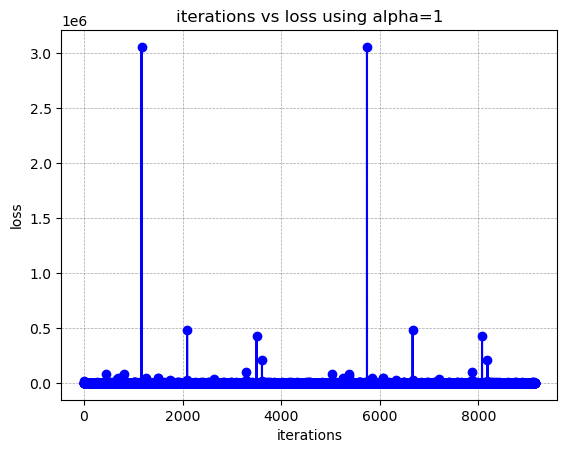

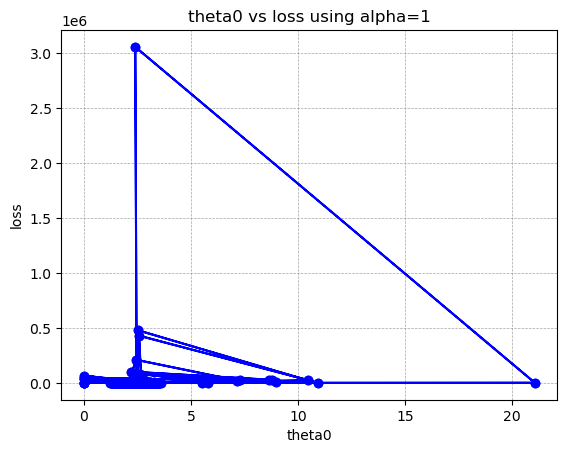

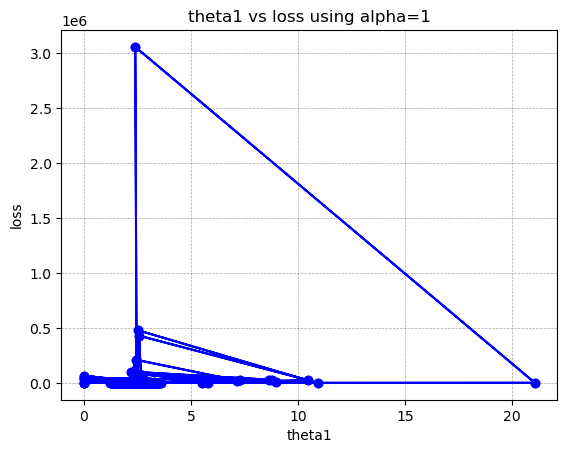

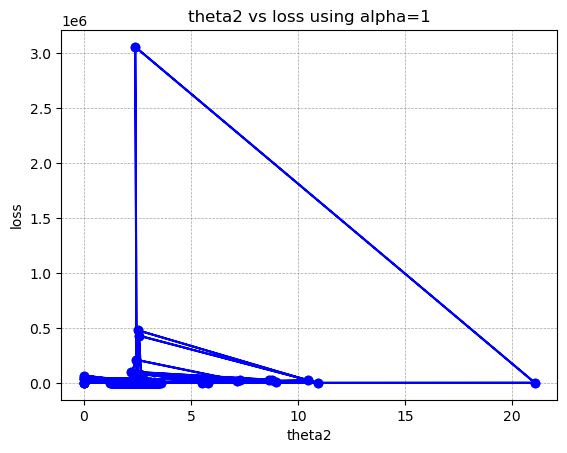

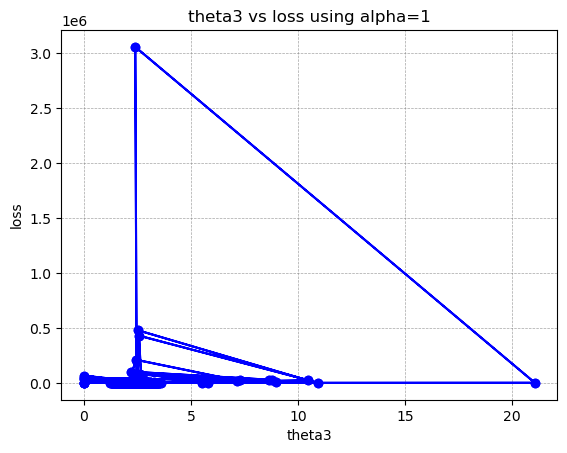

In [85]:
# Create an instance of GradientDescent_first
gd_2 = BFGS(5,      #enter initialization values
            1,     #enter batch size
            1,  #enter learning rate
            1000,    #enter maximum number of iterations
            0.1,   #enter convergance value for gradient
            0.001)   #enter convergance value for cost
# Call the run_gradient_descent method
gd_2.run(cleaned_data)